# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Sarah Howard

### Github Repository: https://github.com/sapapesh/WebMining.Mod6

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Question 1

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [1]:
import requests
from bs4 import BeautifulSoup
import pickle

# Define the URL to fetch the article HTML from
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Send a GET request to fetch the page content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Extract the article's HTML content (you can target specific parts of the page if needed)
    article_html = soup.prettify()  # This gives the entire HTML structure in a readable format

    # Define the filename to save the pickle
    output_filename = "article_content.pkl"

    # Save the HTML to a .pkl file using pickle
    with open(output_filename, 'wb') as f:
        pickle.dump(article_html, f)
    
    print(f"Article HTML saved to {output_filename}")
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")


Article HTML saved to article_content.pkl


### Question 2

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [4]:
# read in HTML content form pkl file
with open('article_content.pkl', 'rb') as f:
    article_content = pickle.load(f)

# find article text 
article_content = soup.find('article')

# print article text 
print(article_content.get_text())





         How Laser Headlights Work
        




          130 Comments
         


           by:
          


            Lewin Day
           







           March 22, 2021
          
























         When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
        

         Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!
        





         Laser Headlights?!
        



           BWM’s prototype laser headlight assemblies undergoing testing.
          


         The first image bro

### Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [40]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the article text with the spaCy pipeline
doc = nlp(article_text)

#Identify custom_stopwords
custom_stopwords = {'comment', 'reply', 'march', '2021', 'hack', 'say', 'says', 'report'}

# Define the tokens we care about
def we_care_about(token):
    return not (
        token.is_space or 
        token.is_punct or 
        token.is_stop or 
        token.text.lower() in custom_stopwords or 
        token.like_num  # Exclude numbers
    )

# Get the interesting tokens (filtered tokens)
interesting_tokens = [token for token in doc if we_care_about(token)]

# Create a frequency count of the interesting tokens (converted to lowercase)
word_freq = Counter(map(lambda token: str(token).lower(), interesting_tokens))

# Get the 5 most common tokens
mostFreqtokens = word_freq.most_common(5)

# Print the common tokens and their frequencies
print("Top 5 Most Frequent Tokens:")
for token, freq in mostFreqtokens:
    print(f"Token: '{token}', Frequency: {freq}")

Top 5 Most Frequent Tokens:
Token: 'hacks', Frequency: 76
Token: 'light', Frequency: 68
Token: 'laser', Frequency: 63
Token: 'headlights', Frequency: 56
Token: 'led', Frequency: 41


### Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [41]:
# Extract the lemmas (base forms) of the interesting tokens
lemmas = [token.lemma_.lower() for token in interesting_tokens]

# Create a frequency count of the lemmas
lemma_freq = Counter(lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Print the common lemmas and their frequencies
print("Top 5 Most Frequent Lemmas:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")

Top 5 Most Frequent Lemmas:
Lemma: 'light', Frequency: 99
Lemma: 'headlight', Frequency: 73
Lemma: 'laser', Frequency: 72
Lemma: 'car', Frequency: 63
Lemma: 'beam', Frequency: 53


### Question 5

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [ ]:
# Store frequent tokens and lemmas in a set
cool_tokens = set()
for token, freq in mostFreqtokens:
    cool_tokens.add(token)

cool_lemmas = set()
for lemma, freq in most_common_lemmas:
    cool_lemmas.add(lemma)

# Get the first sentence in the article
first_sentence = list(doc.sents)[0]
count = 0
for token in first_sentence:
    if token.text.lower() in cool_tokens:
        count += 1

# Remove the junk newlines and replace with nothing
sent_str = str(first_sentence).replace('\n', '').replace('  ', ' ')

# Print the count and the sentence text
print(count, ":", sent_str)

# Method to score by token
def score_sentence_by_token(sentence, interesting_tokens):
    sentence_text = sentence.text
    doc = nlp(sentence_text)
    token_count = sum(1 for token in doc if token.text.lower() in interesting_tokens)
    tokens_score = token_count / len(doc)
    return tokens_score

# Method to score by lemma
def score_sentence_by_lemma(sentence, interesting_lemmas):
    sentence_text = sentence.text
    doc = nlp(sentence_text)
    lemma_count = sum(1 for token in doc if token.lemma_ in interesting_lemmas)
    lemma_score = lemma_count / len(doc)
    return lemma_score

# Calculate scores for the first sentence
token_score = score_sentence_by_token(first_sentence, cool_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, cool_lemmas)

# Print the scores
print(f"First sentence token score: {token_score}")
print(f"First sentence lemma score: {lemma_score}")

5 :   How Laser Headlights Work | Hackaday    Skip to content     Hackaday      Primary Menu       Home         Blog         Hackaday.io         Tindie         Hackaday Prize         Submit         About          Search for:         March 27, 2021        How Laser Headlights Work         130 Comments          by:           Lewin Day           March 22, 2021          When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
First sentence token score: 0.060240963855421686
First sentence lemma score: 0.012048192771084338


### Question 6

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

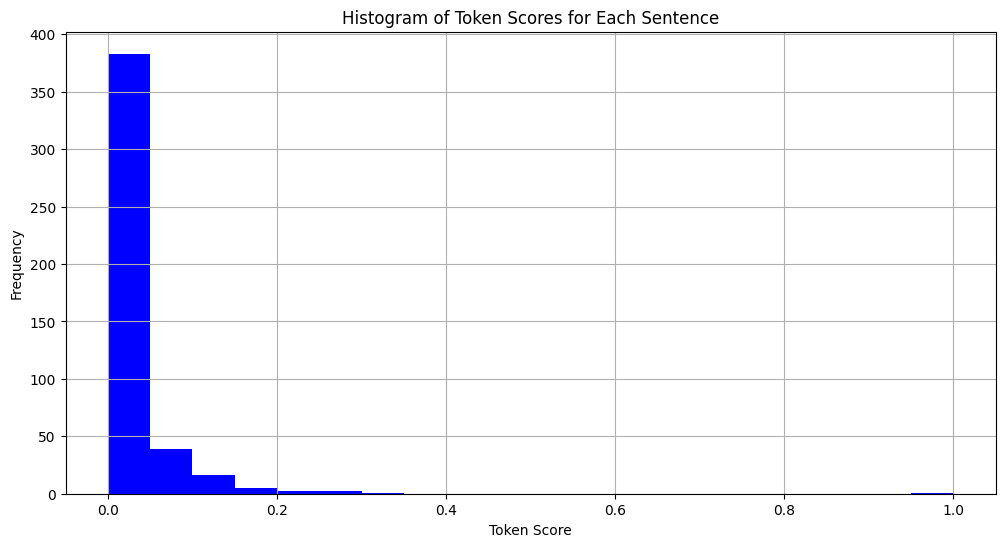

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Add in html with .pkl identifier
input_file ="article_content.pkl"
with open(input_file, "rb") as f:
    article_content = pickle.load(f)

# Extract the text, use Beautifulsoup to parse html
soup = BeautifulSoup(article_content, 'html.parser')
article_text = soup.get_text()

# Interesting tokens from question 3
interesting_tokens = ["hacks", "lights", "laser", "headlights", "led"]

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
# Process the article
doc = nlp(article_text)

# Method to score by token
def score_sentence_by_token(sentence, interesting_tokens):
    tokens = [token.text.lower() for token in sentence if not token.is_punct and not token.is_space]
    if len(tokens) == 0:
        return 0
    interesting_count = sum(1 for token in tokens if token in interesting_tokens)
    return interesting_count / len(tokens)

# List to store token scores of each sentence
token_scores = []

# Get scores for all sentences in the article
for sentence in doc.sents:
    score = score_sentence_by_token(sentence, interesting_tokens)
    token_scores.append(score)

# Plot the histogram
plt.figure(figsize=(12,6))
plt.hist(token_scores, bins=20, color='blue')
plt.title("Histogram of Token Scores for Each Sentence")
plt.xlabel("Token Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## The most common range of scores seems to be 0.0 to 0.2.



### Question 7

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

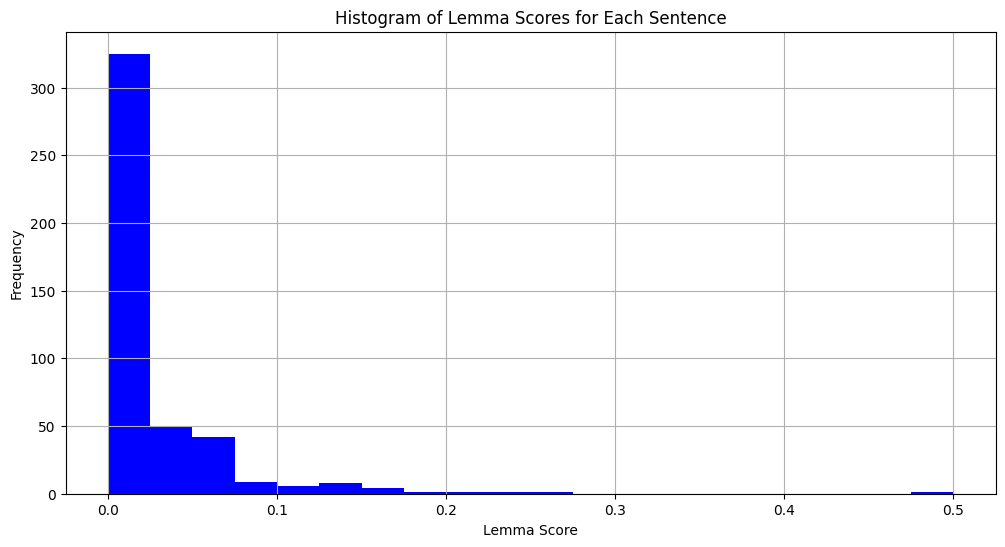

In [74]:
# Interesting lemmas from question 4
interesting_lemma = ["light", "headlight", "laser", "car", "beam"]

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
# Process the article
doc = nlp(article_text)

# Method to score by lemma
def score_sentence_by_lemma(sentence, interesting_lemma):
    lemma = [lemma.text.lower() for lemma in sentence if not lemma.is_punct and not lemma.is_space]
    if len(lemma) == 0:
        return 0
    interesting_count = sum(1 for lemma in lemma if lemma in interesting_lemma)
    return interesting_lemma / len(lemma)

# List to store lemma scores of each sentence
lemma_scores = []

# Get scores for all sentences in the article
for sentence in doc.sents:
    score = score_sentence_by_token(sentence, interesting_lemma)
    lemma_scores.append(score)

# Plot the histogram
plt.figure(figsize=(12,6))
plt.hist(lemma_scores, bins=20, color='blue')
plt.title("Histogram of Lemma Scores for Each Sentence")
plt.xlabel("Lemma Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## The most common range of scores seems to be 0.0 to 0.1

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).